# **Exploratory Data Analysis**

Data loading and Identify the dataframe structure

In [53]:
#import neccessary libraries
import pandas as pd
import numpy as np

In [54]:
#Load the dataset
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
#Check no.of rows and colunms
df.shape

(21613, 21)

In [56]:
#Check the columns
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
#Check the data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [58]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Find columns with negative values
negative_values = df[numerical_cols].lt(0).any()

negative_cols = negative_values[negative_values].index.tolist()
print("Columns containing negative values:", negative_cols)

Columns containing negative values: ['long']


In [59]:
# Check for missing values
print(df.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [60]:
#Check duplicated rows
print("No of duplicated rows: ", df.duplicated().sum())

No of duplicated rows:  0


In [61]:
#inspect unique value
print(df[['view', 'condition', 'grade']].nunique())


view          5
condition     5
grade        12
dtype: int64


In [62]:
#inspect unique count
print(df[['view', 'condition', 'grade']].value_counts())

view  condition  grade
0     3          7        5019
                 8        3900
      4          7        2673
      3          9        1752
      4          8        1183
                          ... 
3     4          5           1
                 12          1
                 13          1
4     1          5           1
      5          12          1
Name: count, Length: 146, dtype: int64


In [63]:
# Convert Date Features to Datetime
df['date'] = pd.to_datetime(df['date'])
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')

#Create a new binary feature renovated_flag (0 = Never Renovated, 1 = Renovated)
df['renovated_flag'] = (df['yr_renovated'] > 0).astype(int)
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)


# Convert Categorical Features
df['zipcode'] = df['zipcode'].astype('category')

# Convert 'id' to categorical
df['id'] = df['id'].astype('category')

# Convert Binary Features
df['waterfront'] = df['waterfront'].astype('category')

# Convert 'view', 'condition', 'grade' to ordinal
ordinal_features = ['view', 'condition', 'grade'] 
df[ordinal_features] = df[ordinal_features].astype(int)

#verify the types
print(df.dtypes)

id                      category
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront              category
view                       int32
condition                  int32
grade                      int32
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated             float64
zipcode                 category
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
renovated_flag             int32
dtype: object


In [64]:
#import pandas as pd

# Convert 'date' to datetime format
#df['date'] = pd.to_datetime(df['date'])

# Convert 'id' to categorical
#df['id'] = df['id'].astype('category')

# Convert 'zipcode' to categorical
#df['zipcode'] = df['zipcode'].astype(str)

# Convert 'waterfront' to binary (already 0 or 1, but ensuring it's integer type)
#df['waterfront'] = df['waterfront'].astype(int)

# Convert 'view', 'condition', 'grade' to ordinal
#ordinal_features = ['view', 'condition', 'grade']
#df[ordinal_features] = df[ordinal_features].astype(int)

# Convert 'yr_built' to datetime format
#df['yr_built'] = pd.to_datetime(df['yr_built'])

# Convert 'yr_renovated ' to datetime format
#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

# Verify the changes
#print(df.dtypes)


In [65]:
# Drop ID Column
df.drop(columns=["id"], inplace=True)
print("Dropping ID column")

Dropping ID column


Descriptive statistics and visualization

In [66]:
#Get Summary statistics of dataset
print(df.describe())

                                date         price      bedrooms  \
count                          21613  2.161300e+04  21613.000000   
mean   2014-10-29 04:38:01.959931648  5.400881e+05      3.370842   
min              2014-05-02 00:00:00  7.500000e+04      0.000000   
25%              2014-07-22 00:00:00  3.219500e+05      3.000000   
50%              2014-10-16 00:00:00  4.500000e+05      3.000000   
75%              2015-02-17 00:00:00  6.450000e+05      4.000000   
max              2015-05-27 00:00:00  7.700000e+06     33.000000   
std                              NaN  3.671272e+05      0.930062   

          bathrooms   sqft_living      sqft_lot        floors          view  \
count  21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
mean       2.114757   2079.899736  1.510697e+04      1.494309      0.234303   
min        0.000000    290.000000  5.200000e+02      1.000000      0.000000   
25%        1.750000   1427.000000  5.040000e+03      1.000000      0.00

In [67]:
print(df['price'].describe())

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


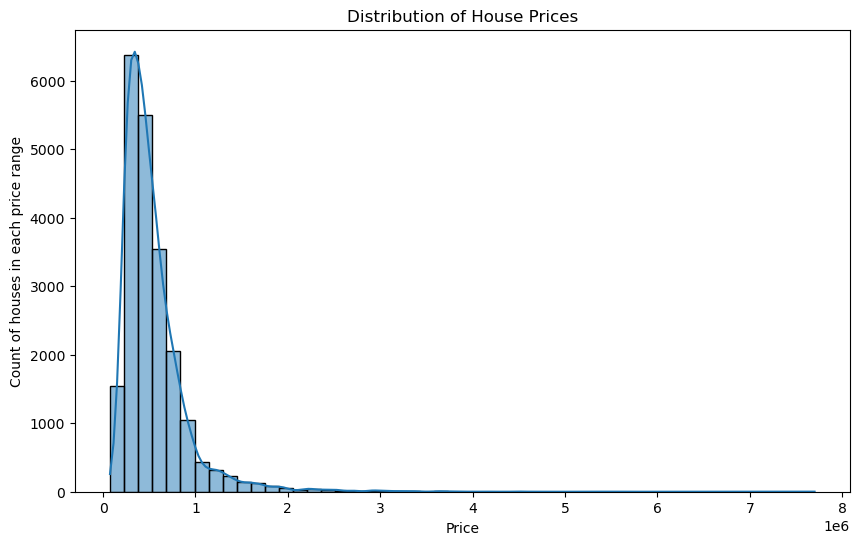

In [68]:
# Distribution of price range
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count of houses in each price range")
plt.show()

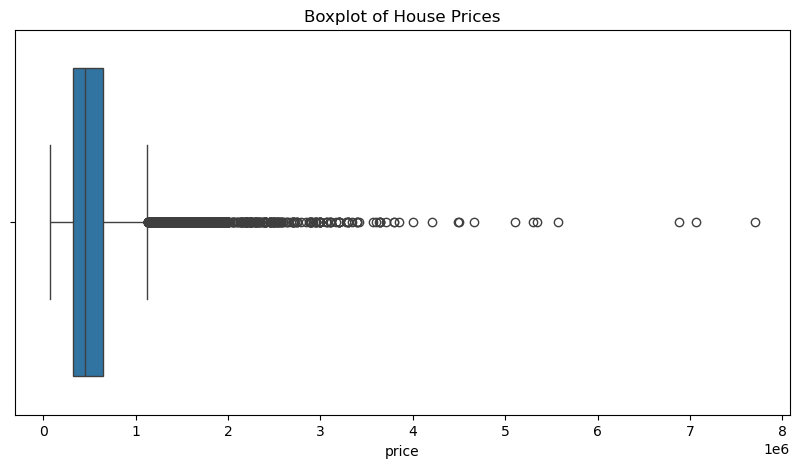

In [75]:
# Boxplot for Outliers detection
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.show()

In [76]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Computing the Interquartile Range (IQR)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])

Number of Outliers: 1146


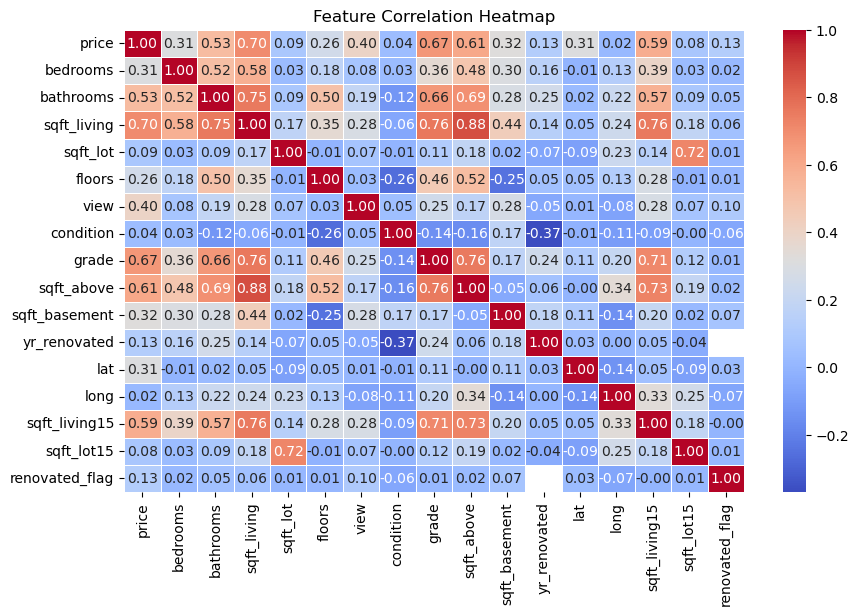

In [69]:
# Heatmap for Feature Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

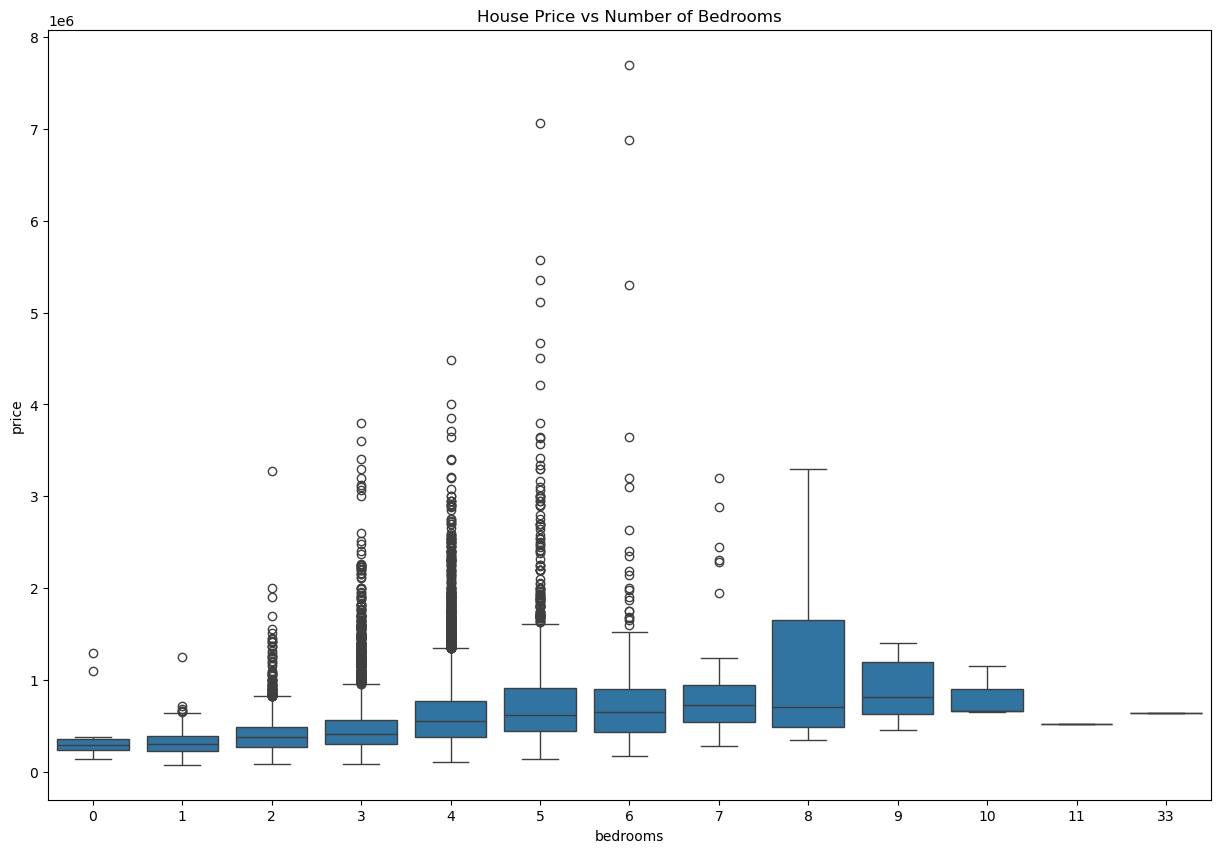

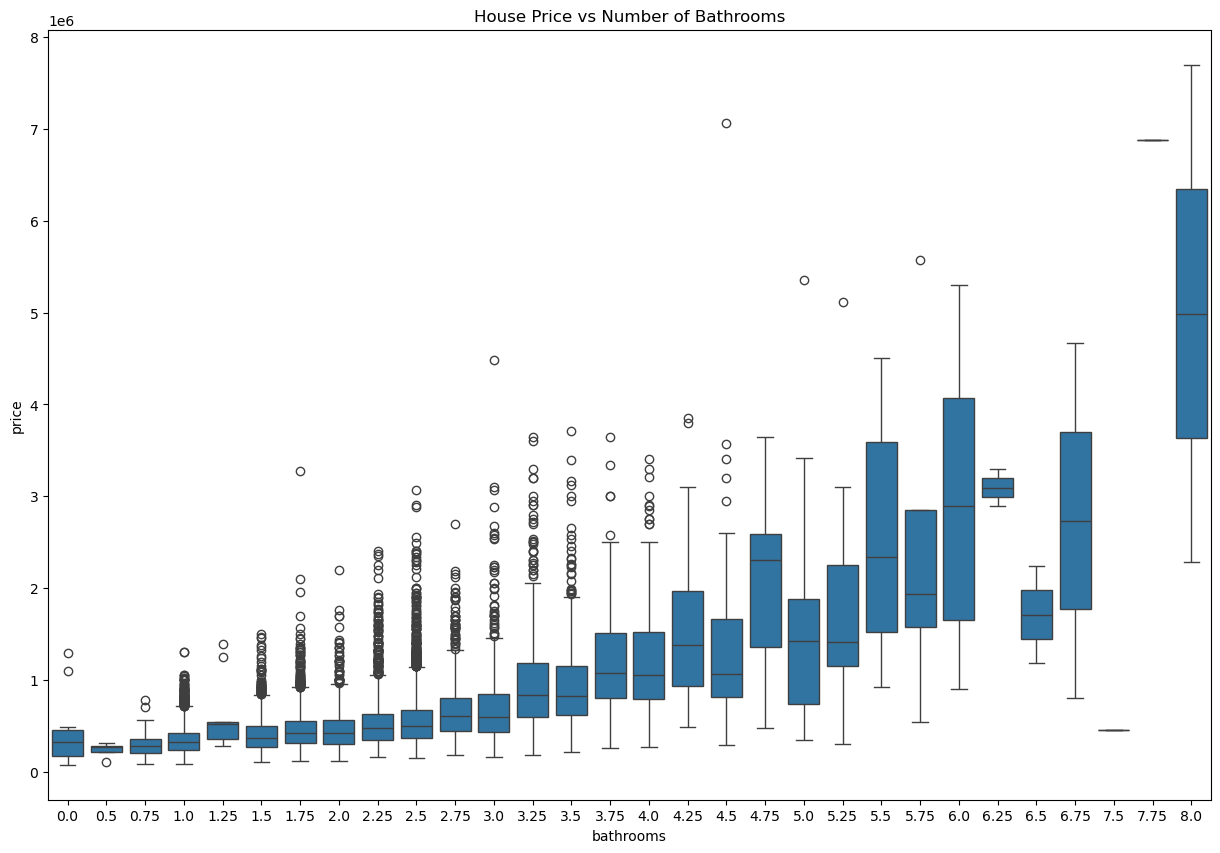

In [70]:
#identify relationship between price and no.of. bedrooms and bathrooms
plt.figure(figsize=(15,10))
sns.boxplot(x=df["bedrooms"], y=df["price"])
plt.title("House Price vs Number of Bedrooms")
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(x=df["bathrooms"], y=df["price"])
plt.title("House Price vs Number of Bathrooms")
plt.show()


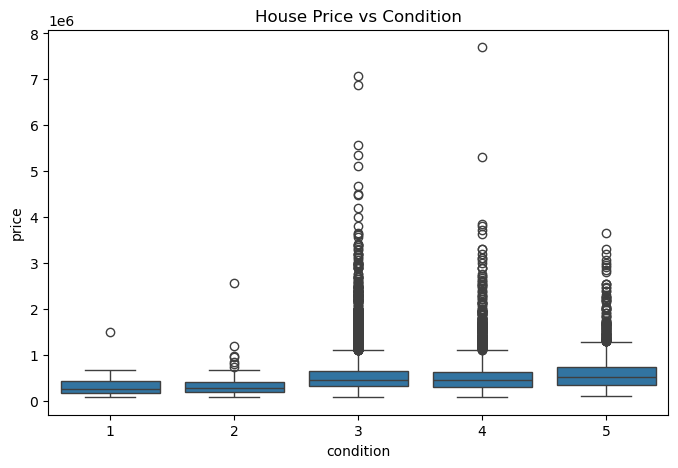

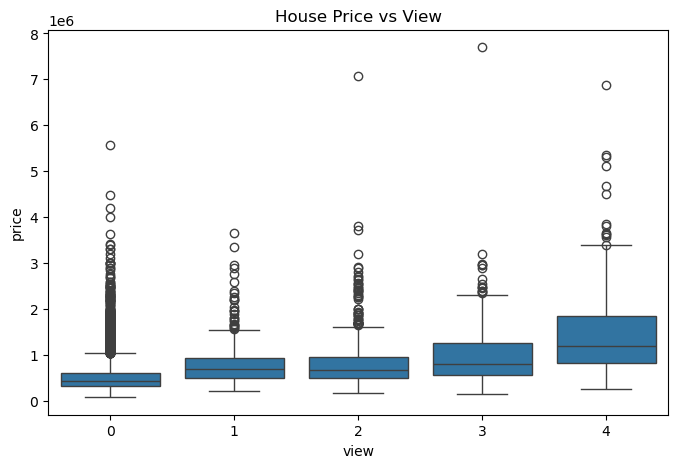

In [71]:

#Price distribution by house condition and view
plt.figure(figsize=(8,5))
sns.boxplot(x=df["condition"], y=df["price"])
plt.title("House Price vs Condition")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df["view"], y=df["price"])
plt.title("House Price vs View")
plt.show()


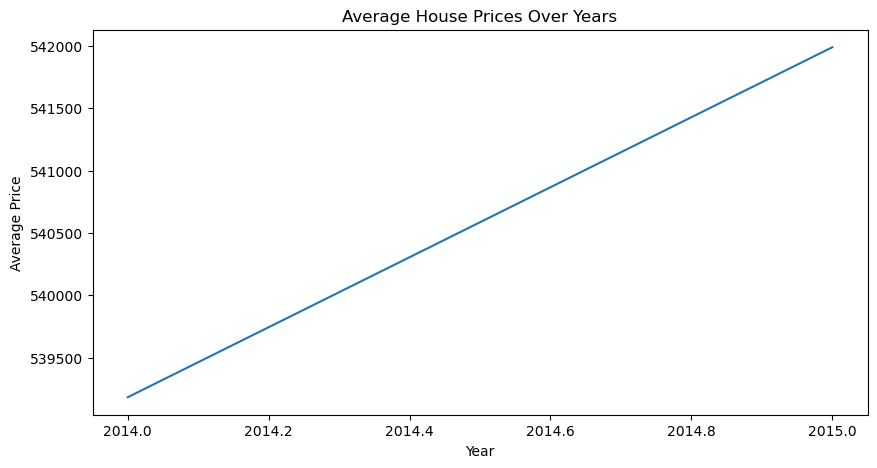

In [72]:
#Get price trend over the time
df['year_sold'] = df['date'].dt.year
avg_price_per_year = df.groupby("year_sold")["price"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values)
plt.title("Average House Prices Over Years")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()


In [73]:
#grouping house prices
# Define price quantiles
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Check distribution
df['price_category'].value_counts()


price_category
Low       7226
Medium    7223
High      7164
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_4420\958388001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['price_category'], y=df['price'], palette='coolwarm')


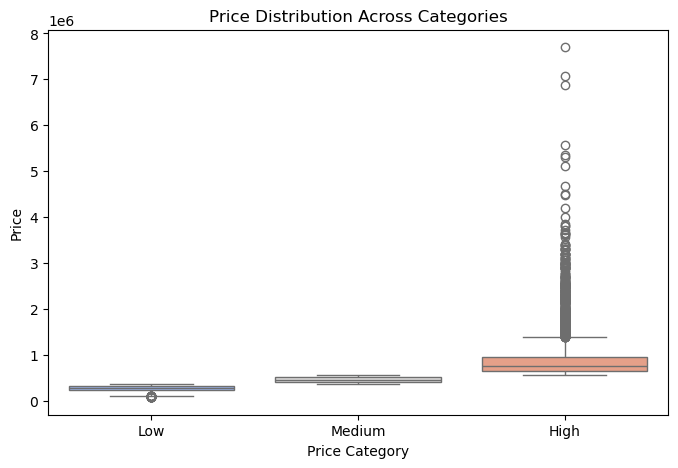

In [74]:
#Boxplot of each price range
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price_category'], y=df['price'], palette='coolwarm')
plt.title("Price Distribution Across Categories")
plt.xlabel("Price Category")
plt.ylabel("Price")
plt.show()
